In [1]:
import pandas as pd

from src.Classifier import ModelTrainer
from src.Preprocess import DataProcessor
from src.DataViz import ResultVisualizer
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

Training without PCA

In [2]:
df = pd.read_csv('data/train.csv')
print(df)
 
#Diviser les données en y_train et y_test -> colonne species.
X = df.drop(columns=['id','species'])
y = df['species']
 
scaler = StandardScaler()
X = scaler.fit_transform(X)
# Encoder les étiquettes
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)  # Convertir 'species' en valeurs numériques
 
 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

       id                species   margin1   margin2   margin3   margin4  \
0       1            Acer_Opalus  0.007812  0.023438  0.023438  0.003906   
1       2  Pterocarya_Stenoptera  0.005859  0.000000  0.031250  0.015625   
2       3   Quercus_Hartwissiana  0.005859  0.009766  0.019531  0.007812   
3       5        Tilia_Tomentosa  0.000000  0.003906  0.023438  0.005859   
4       6     Quercus_Variabilis  0.005859  0.003906  0.048828  0.009766   
..    ...                    ...       ...       ...       ...       ...   
985  1575   Magnolia_Salicifolia  0.060547  0.119140  0.007812  0.003906   
986  1578            Acer_Pictum  0.001953  0.003906  0.021484  0.107420   
987  1581     Alnus_Maximowiczii  0.001953  0.003906  0.000000  0.021484   
988  1582          Quercus_Rubra  0.000000  0.000000  0.046875  0.056641   
989  1584         Quercus_Afares  0.023438  0.019531  0.031250  0.015625   

      margin5   margin6   margin7  margin8  ...  texture55  texture56  \
0    0.011719 

In [3]:
Pd = DataProcessor()
data = df
data = data.drop('id', axis = 1)
labels = data['species'].copy()
encoded_labels = Pd.encode_labels(labels)
data['species'] = encoded_labels
data.head() 

,species,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,margin9,...,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
0,3,0.007812,0.023438,0.023438,0.003906,0.011719,0.009766,0.027344,0.0,0.001953,...,0.007812,0.000000,0.002930,0.002930,0.035156,0.0,0.0,0.004883,0.000000,0.025391
1,49,0.005859,0.000000,0.031250,0.015625,0.025391,0.001953,0.019531,0.0,0.000000,...,0.000977,0.000000,0.000000,0.000977,0.023438,0.0,0.0,0.000977,0.039062,0.022461
2,65,0.005859,0.009766,0.019531,0.007812,0.003906,0.005859,0.068359,0.0,0.000000,...,0.154300,0.000000,0.005859,0.000977,0.007812,0.0,0.0,0.000000,0.020508,0.002930
3,94,0.000000,0.003906,0.023438,0.005859,0.021484,0.019531,0.023438,0.0,0.013672,...,0.000000,0.000977,0.000000,0.000000,0.020508,0.0,0.0,0.017578,0.000000,0.047852
4,84,0.005859,0.003906,0.048828,0.009766,0.013672,0.015625,0.005859,0.0,0.000000,...,0.096680,0.000000,0.021484,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.031250


In [6]:
classifiers = [ 
    {
        'model_name':'RandomForestClassifier',
        'hyperparameters': {
            'n_estimators' : [50, 75, 100],
            'min_samples_split': [2, 3, 4, 5],
            'criterion': ["gini", "entropy"],
        }
    },
    {    
        'model_name': 'SGDClassifier', 
        'hyperparameters':{
            'loss': ['hinge', 'log_loss'],
            'alpha': [0.0001, 0.001, 0.01],
        }
    },
    { 
        'model_name': 'BaggingClassifier', 
        'hyperparameters':{
            'n_estimators': [50, 75, 100],
            'max_samples': [0.5, 0.7, 1.0],
            'bootstrap': [True, False]
        } 
    },
    {
        'model_name': 'SVC',  
        'hyperparameters':{
            'kernel': ['linear', 'poly','rbf','sigmoid']
        }
    }
]

In [7]:
Cd = ModelTrainer()
classifiers = Cd.match_classifiers(classifiers)

fited_models, best_scores, best_estimators = Cd.fit_models(X_train, y_train, classifiers)

print(f'the best score is {best_scores} for the model :{best_estimators} ')

the best score is [0.9696839423612769, 0.9633946341851762, 0.9330785765464533, 0.9861077939654486] for the model :[RandomForestClassifier(min_samples_split=5), SGDClassifier(loss='log_loss'), BaggingClassifier(bootstrap=False, max_samples=0.7, n_estimators=100), SVC(kernel='linear')] 


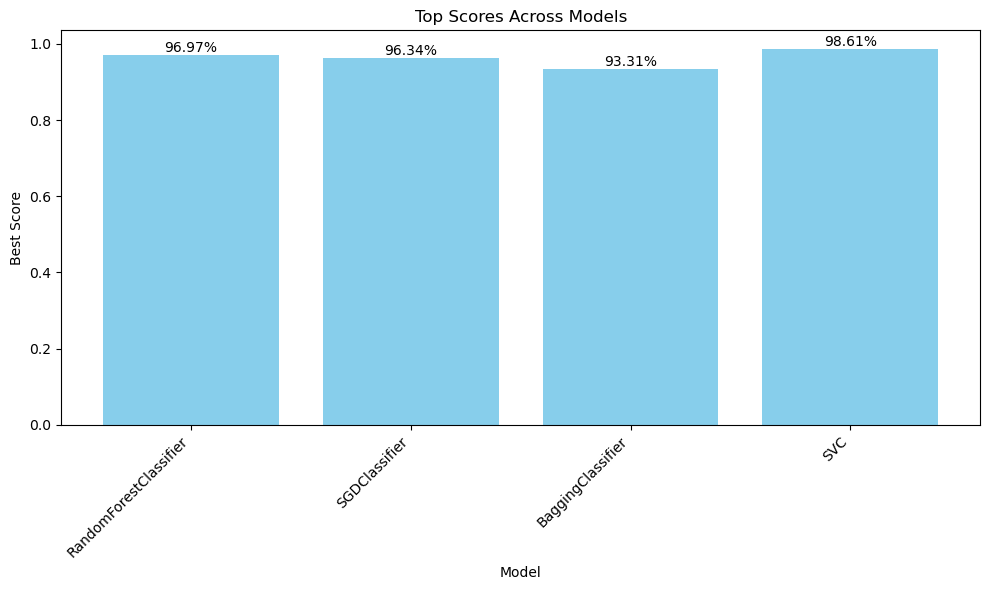

In [8]:
RV = ResultVisualizer()
RV.display_best_scores(best_scores, classifiers)

Comparing the Metrics Across All Classifiers

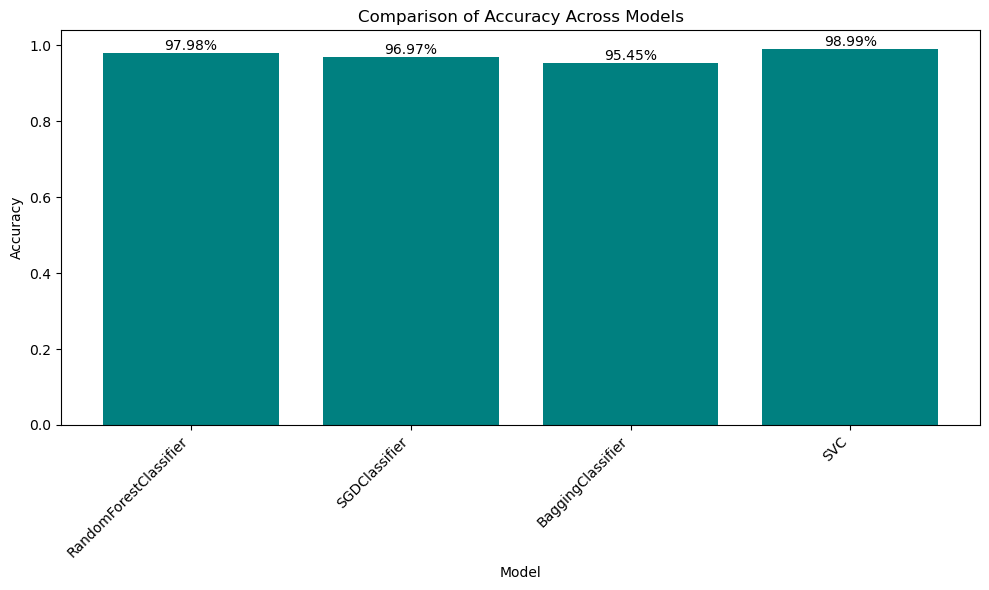

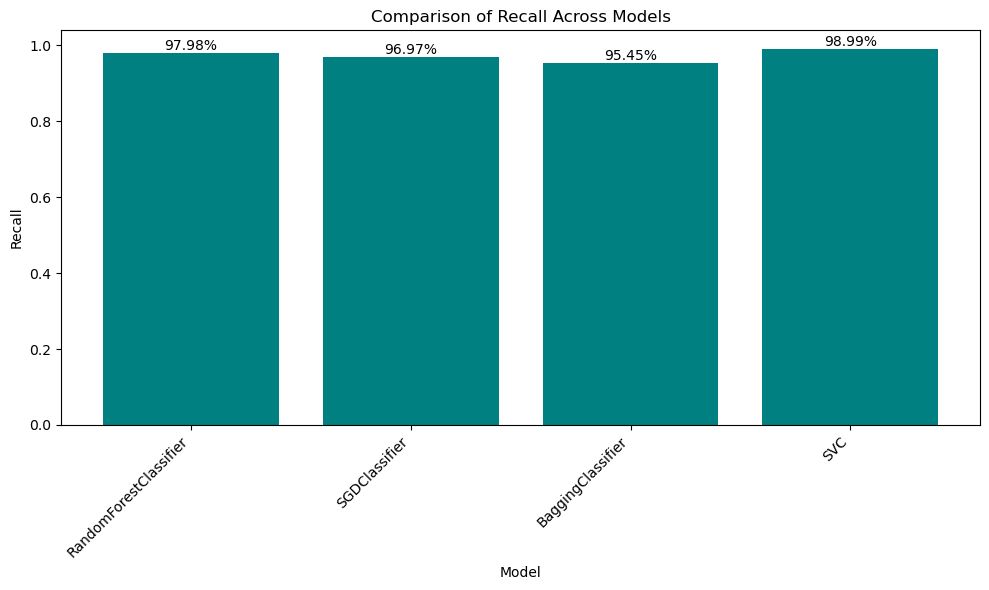

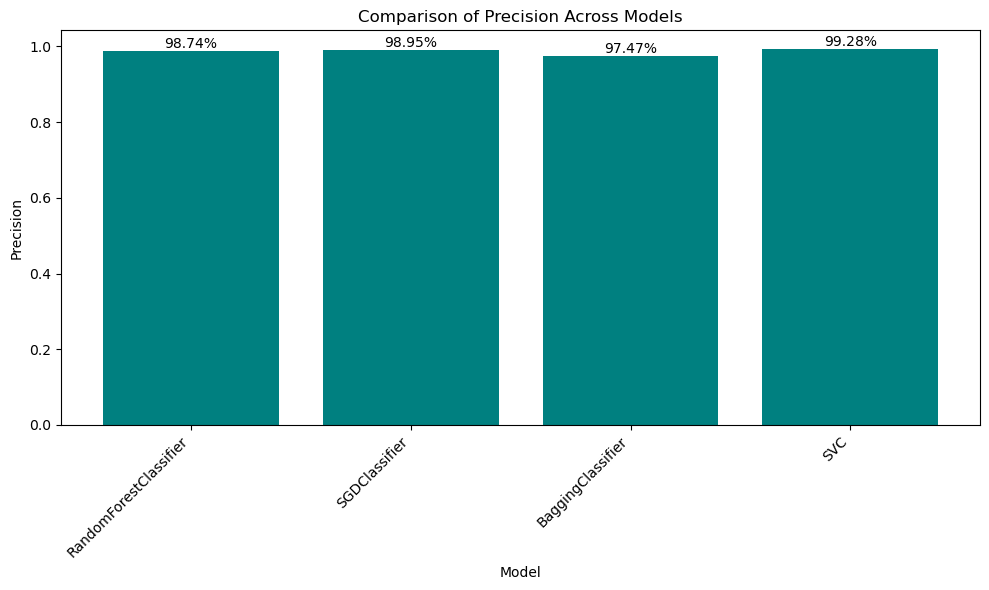

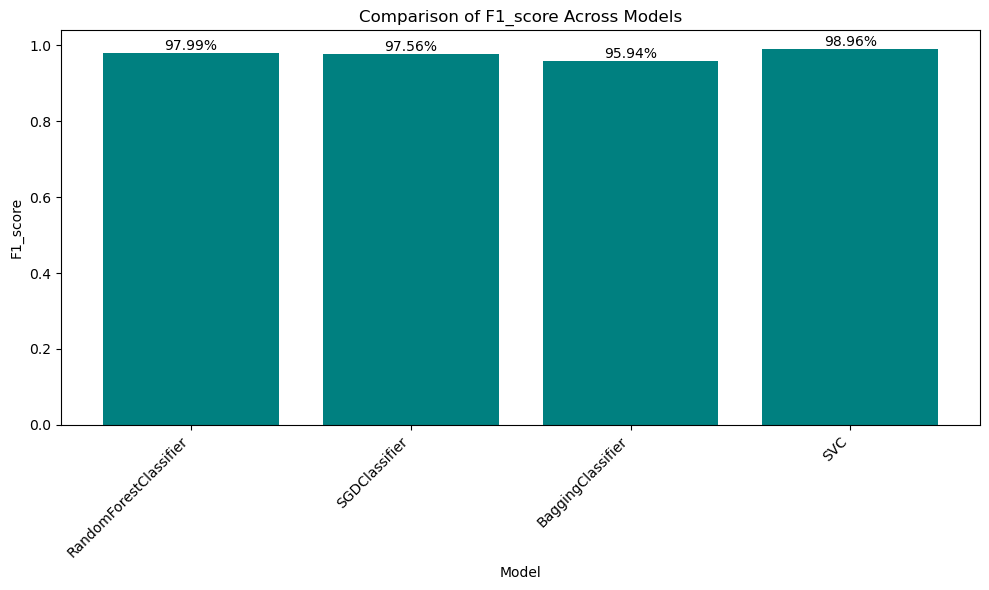

In [9]:
evaluation_results = Cd.assess_models(X_test, y_test,fited_models, classifiers)
RV.display_evaluation_metrics(evaluation_results)

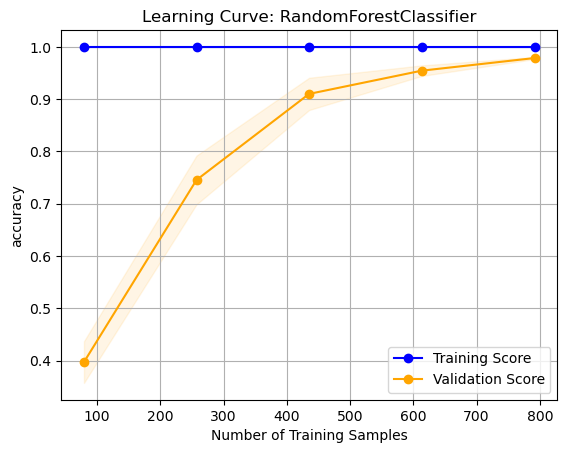

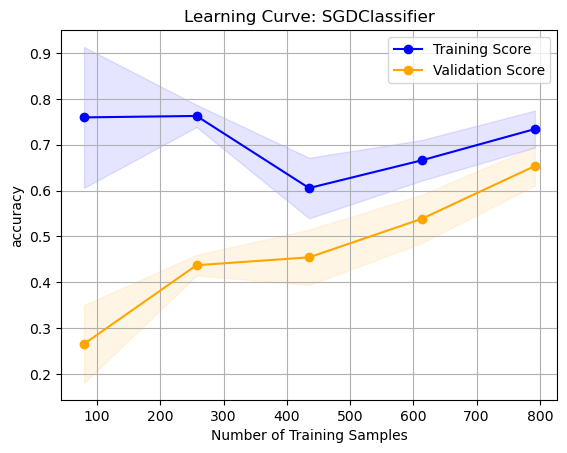

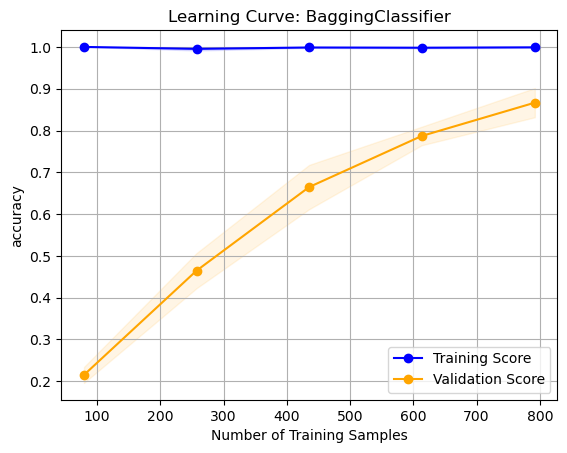

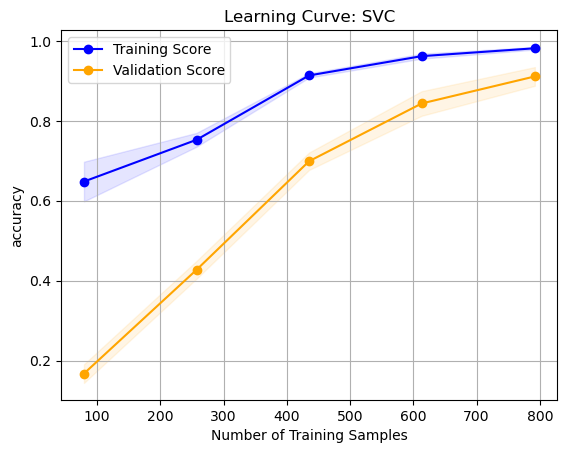

In [10]:
X =data.drop('species', axis = 1)
y = data['species']
RV.show_learning_curves(X, y, classifiers)

PCA

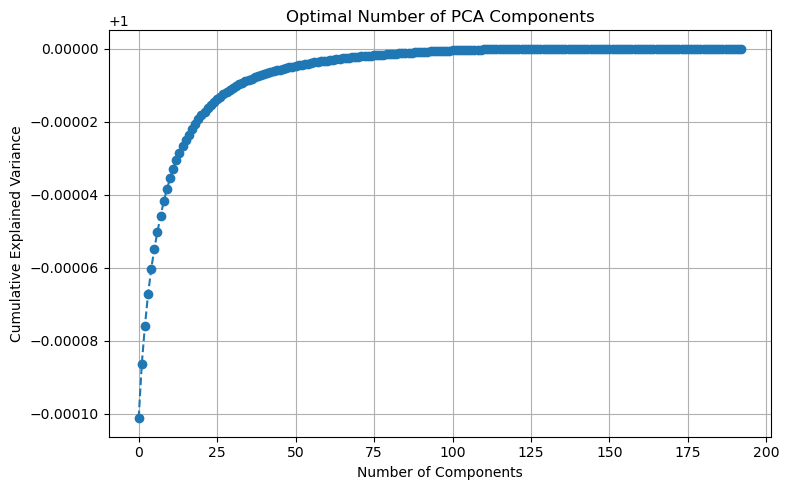

In [11]:
RV.visualize_explained_variance(data)

In [12]:
#reduce dimensions using PCA
new_df = Pd.apply_pca(data,40)
df_normalized = Pd.scale_features(new_df.iloc[:, :-1], new_df.iloc[:, :-1].columns)
data = pd.concat([df_normalized, new_df['species']], axis=1)
data.head(5)

,principal_component_1,principal_component_2,principal_component_3,principal_component_4,principal_component_5,principal_component_6,principal_component_7,principal_component_8,principal_component_9,principal_component_10,...,principal_component_32,principal_component_33,principal_component_34,principal_component_35,principal_component_36,principal_component_37,principal_component_38,principal_component_39,principal_component_40,species
0,0.969386,0.571046,0.133725,0.223762,0.541531,0.357689,0.461063,0.489628,0.581354,0.500401,...,0.490539,0.499822,0.404037,0.497457,0.382985,0.508013,0.472756,0.334831,0.463033,3
1,0.499999,0.635498,0.078437,0.379114,0.447999,0.335309,0.427995,0.522214,0.593366,0.305241,...,0.296109,0.195057,0.422761,0.483262,0.690553,0.356130,0.366111,0.388304,0.390684,49
2,0.336736,0.312712,0.066587,0.597931,0.415363,0.473244,0.534906,0.314967,0.664597,0.273947,...,0.585832,0.404124,0.555127,0.388759,0.437852,0.483338,0.356546,0.667778,0.487766,65
3,0.040816,0.577770,0.061744,0.305613,0.466021,0.517117,0.612321,0.623734,0.601277,0.289756,...,0.657728,0.320261,0.290399,0.346625,0.367543,0.398070,0.474417,0.620681,0.436209,94
4,0.142858,0.281473,0.076511,0.507378,0.470877,0.590290,0.475586,0.297472,0.496120,0.449921,...,0.350057,0.274516,0.284366,0.266870,0.182928,0.591404,0.431417,0.252200,0.496276,84


In [13]:
X_train, X_test, y_train, y_test = Pd.split_dataset(data, 'species')

In [14]:
#Train the classifiers
fited_models, best_scores, best_estimators = Cd.fit_models(X_train, y_train, classifiers)


### Comparison of Metrics for Each Classifier

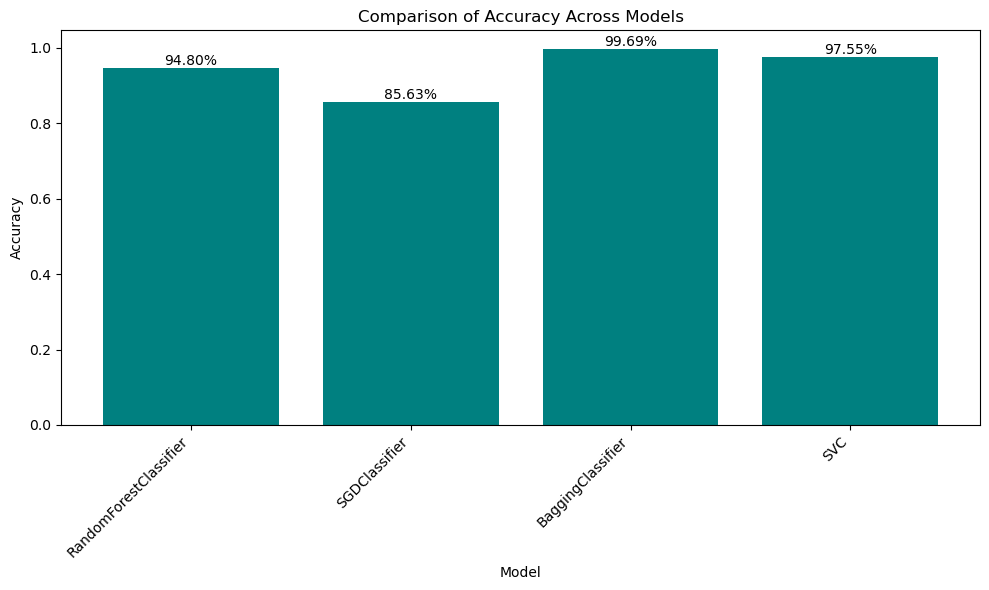

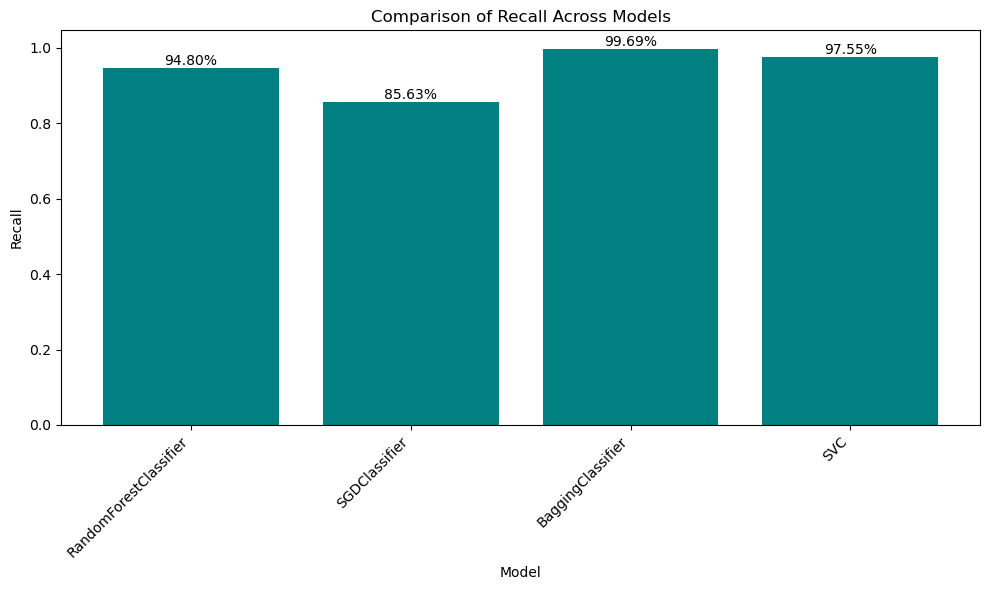

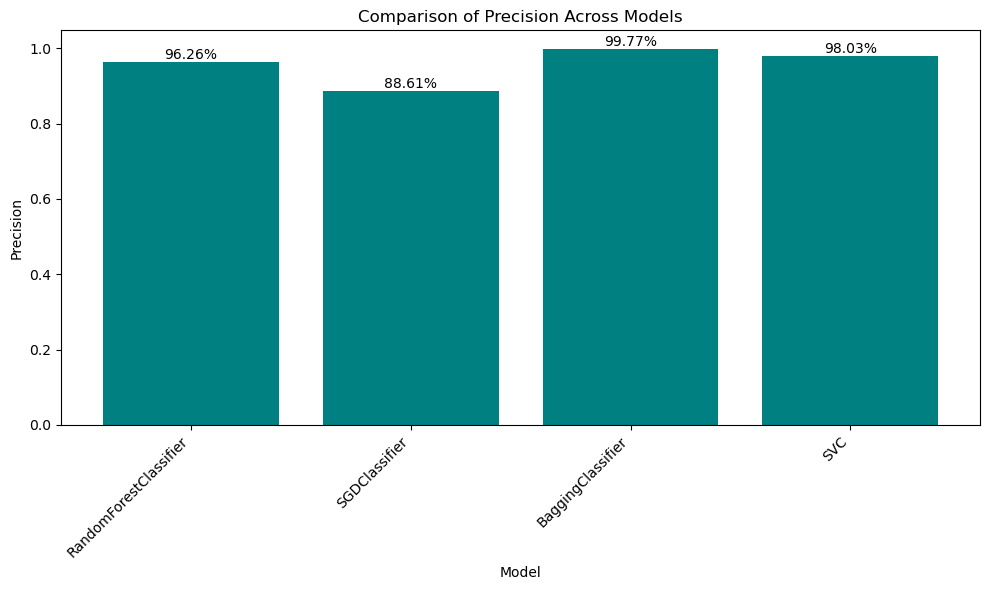

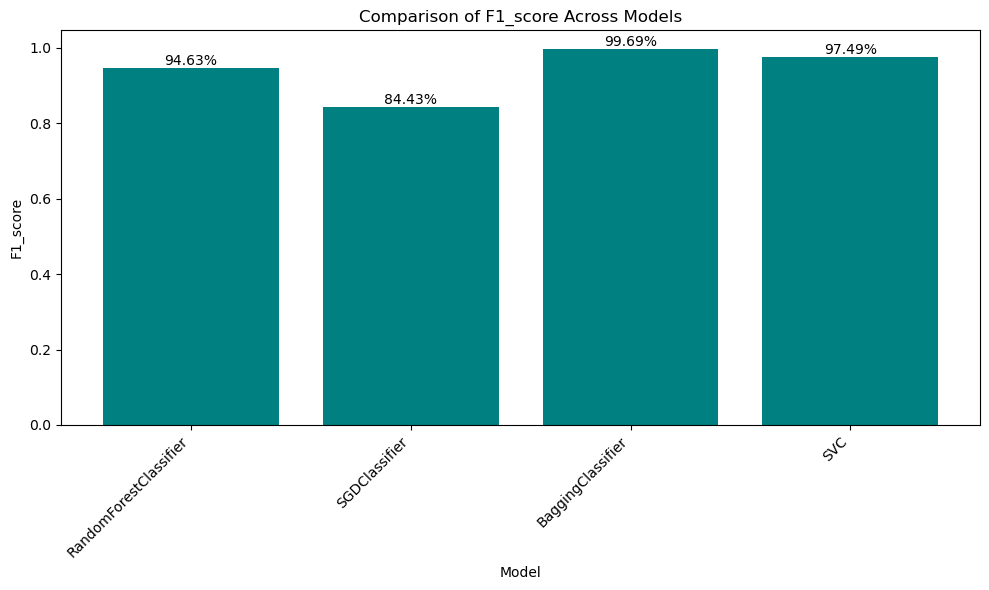

In [15]:
evaluation_results = Cd.assess_models(X_test, y_test,fited_models, classifiers)
RV.display_evaluation_metrics(evaluation_results)

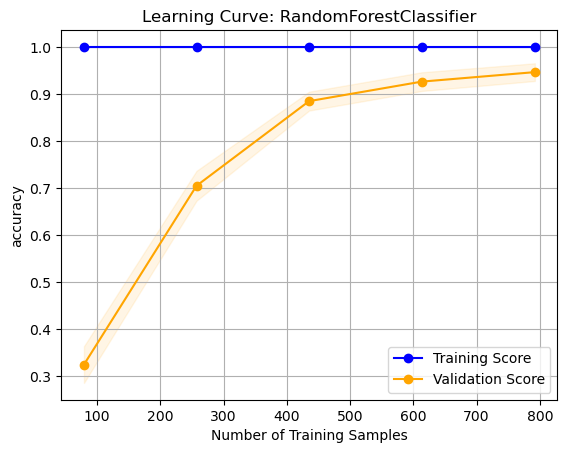

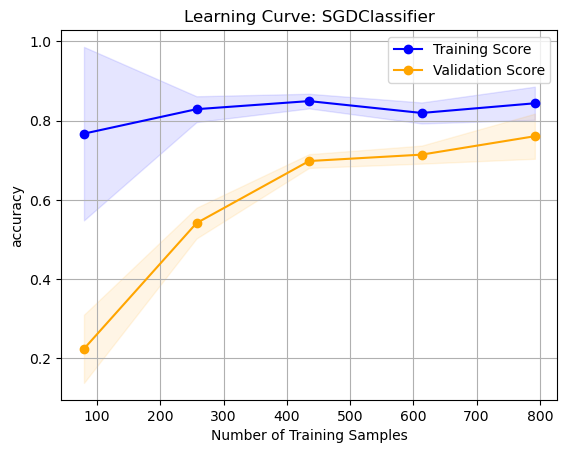

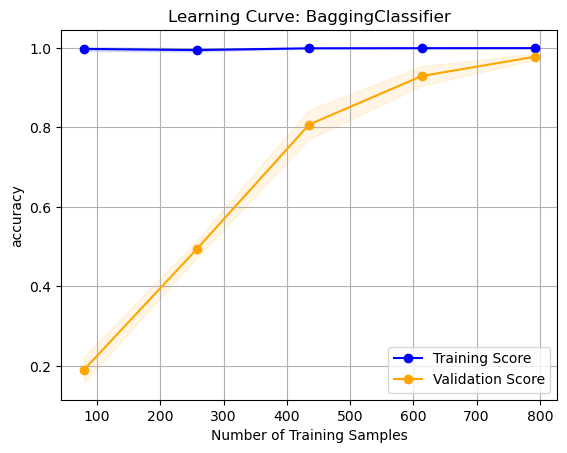

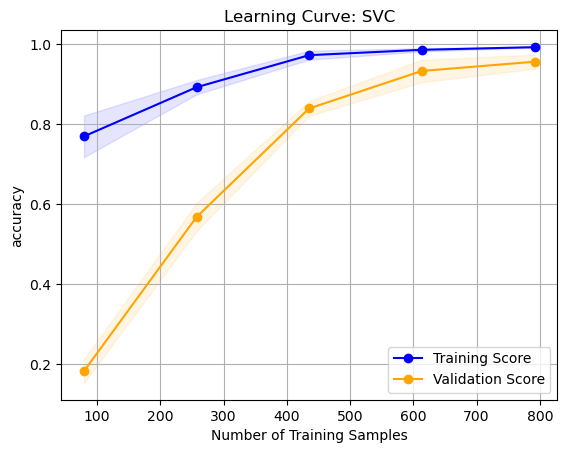

In [16]:
X =data.drop('species', axis = 1)
y = data['species']
RV.show_learning_curves(X, y, classifiers)